# Fully Dynamic All Pairs Shortest Path Algorithms

##### Library imports

In [4]:
import numpy as np
import math
import copy
from queue import PriorityQueue
import networkx as nx

---

## Sample Graph for Illustration

{(1, 2): Text(0.654508476093664, 0.47552828417802706, '2'),
 (2, 3): Text(-0.25000005215406573, 0.7694209149307285, '1'),
 (3, 4): Text(-0.8090170266931362, -2.980232327587373e-08, '5'),
 (3, 5): Text(-0.24999997764825752, -0.18163562362300228, '1'),
 (4, 1): Text(0.09549150155459352, -0.2938926605550248, '2'),
 (4, 2): Text(-0.25000002235174246, 0.18163562362300228, '3'),
 (5, 4): Text(-0.24999994784593424, -0.7694209149307285, '1')}

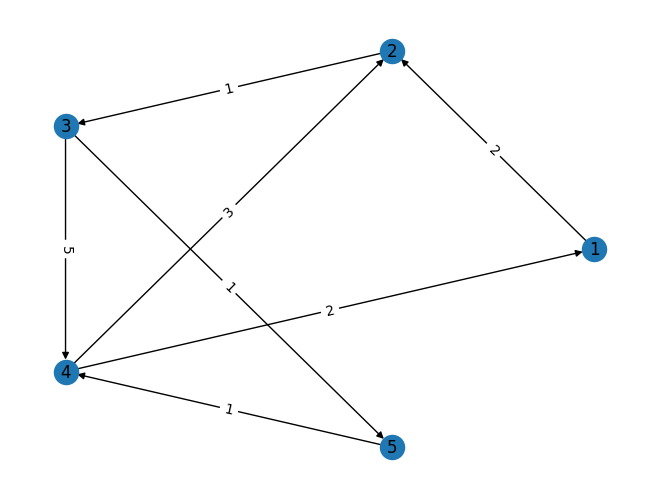

In [2]:
# Adjacency matrix for a directed graph with 6 nodes
# A = np.array([[0, 2, 0, 0, 0, 0],
#                 [0, 0, 1, 1, 0, 0],
#                 [0, 0, 0, 1, 0, 0],
#                 [0, 0, 0, 0, 1, 1],
#                 [0, 0, 0, 0, 0, 1],
#                 [1, 0, 0, 0, 0, 0]], dtype=np.float16)

# G = nx.from_numpy_array(A, create_using=nx.DiGraph())

G = nx.DiGraph()
G.add_edge(1, 2, weight=2)
G.add_edge(2, 3, weight=1)
G.add_edge(3, 4, weight=5)
G.add_edge(3, 5, weight=1)
G.add_edge(4, 1, weight=2)
G.add_edge(4, 2, weight=3)
G.add_edge(5, 4, weight=1)

pos=nx.circular_layout(G)
nx.draw(G,pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [3]:
A = nx.to_numpy_array(G)
A

array([[0., 2., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 5., 1.],
       [2., 3., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [4]:
# Weights matrix for the above graph
W = copy.deepcopy(A)
W[W == 0] = math.inf
W[np.diag_indices(W.shape[0])] = 0
W

array([[ 0.,  2., inf, inf, inf],
       [inf,  0.,  1., inf, inf],
       [inf, inf,  0.,  5.,  1.],
       [ 2.,  3., inf,  0., inf],
       [inf, inf, inf,  1.,  0.]])

### Using Dijsktra's Algorithm for each pair

In [5]:
%%timeit
dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

30 µs ± 3.94 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [6]:
apsp = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))
apsp

{1: {1: 0, 2: 2, 3: 3, 5: 4, 4: 5},
 2: {2: 0, 3: 1, 5: 2, 4: 3, 1: 5},
 3: {3: 0, 5: 1, 4: 2, 1: 4, 2: 5},
 4: {4: 0, 1: 2, 2: 3, 3: 4, 5: 5},
 5: {5: 0, 4: 1, 1: 3, 2: 4, 3: 5}}

### Using Bellman-Ford for each pair

In [7]:
%%timeit
dict(nx.all_pairs_bellman_ford_path_length(G, weight='weight'))

59 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
apsp = dict(nx.all_pairs_bellman_ford_path_length(G, weight='weight'))
apsp

{1: {1: 0, 2: 2, 3: 3, 4: 5, 5: 4},
 2: {2: 0, 3: 1, 4: 3, 5: 2, 1: 5},
 3: {3: 0, 4: 2, 5: 1, 1: 4, 2: 5},
 4: {4: 0, 1: 2, 2: 3, 3: 4, 5: 5},
 5: {5: 0, 4: 1, 1: 3, 2: 4, 3: 5}}

### Using Floyd-Warshall

In [9]:
%%timeit
nx.floyd_warshall(G, weight='weight')

36.6 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
apsp = nx.floyd_warshall(G, weight='weight')
apsp

{1: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {1: 0, 2: 2, 3: 3, 4: 5, 5: 4}),
 2: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {2: 0, 3: 1, 1: 5, 4: 3, 5: 2}),
 3: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {3: 0, 4: 2, 5: 1, 1: 4, 2: 5}),
 4: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {4: 0, 1: 2, 2: 3, 3: 4, 5: 5}),
 5: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {5: 0, 4: 1, 1: 3, 2: 4, 3: 5})}

### Using Johnson's Algorithm

In [11]:
%%timeit
nx.johnson(G, weight='weight')

60.1 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
apsp = nx.johnson(G, weight='weight')
apsp

{1: {1: [1], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 3, 5, 4], 5: [1, 2, 3, 5]},
 2: {2: [2], 3: [2, 3], 4: [2, 3, 5, 4], 5: [2, 3, 5], 1: [2, 3, 5, 4, 1]},
 3: {3: [3], 4: [3, 5, 4], 5: [3, 5], 1: [3, 5, 4, 1], 2: [3, 5, 4, 2]},
 4: {4: [4], 1: [4, 1], 2: [4, 2], 3: [4, 2, 3], 5: [4, 2, 3, 5]},
 5: {5: [5], 4: [5, 4], 1: [5, 4, 1], 2: [5, 4, 2], 3: [5, 4, 2, 3]}}

## Shortest Paths and Matrix Multiplication

#### Algorithm to extend a shortest path

Computing APSP requires computing $L^{(n-1)}$, where $L^{(n-1)}$ is the matrix of shortest paths of length at most $n-1$ vertices.

Computing successive L matrices is done by extending a shortest path of length $i-1$ to a shortest path of length $i$.<br>
This can be done by multiplying the $L^{(i-1)}$ matrix by the weights matrix $W$ of the graph in the ring [$\mathrm{R};min;+$].<br>
The resulting matrix $L^{(i)}$ contains the shortest paths of length at most $i$.<br>
It takes $O(n^3)$ time to compute $L^{(i)}$ from $L^{(i-1)}$.

In [13]:
def extend_shortest_paths(L, W):
    """
    Extend shortest paths.
    Args:
        L: matrix of shortest paths
        W: matrix of Weights
    Returns:
        matrix of shortest paths
    """
    
    n = len(L)  # number of nodes
    L1 = np.full((n, n), math.inf)  # initialize L1
    for i in range(n):
        for j in range(n):
            for k in range(n):
                L1[i, j] = min(L1[i, j], L[i, k] + W[k, j]) # update L1
    return L1

Computing $L^{(n-1)}$ successively requires $n-1$ matrix multiplications, each taking $O(n^3)$ time.<br>
Thus, the total time is $O(n^4)$.

In [14]:
def slow_apsp(W):
    """
    Slow all-pairs shortest paths.
    Args:
        W: matrix of Weights
    Returns:
        matrix of shortest paths
    """
        
    n = len(W)
    L = copy.deepcopy(W)
    for m in range(2, n):
        L = extend_shortest_paths(L, W)
    return L

However, since we require only the final matrix $L^{(n-1)}$, we can compute it using repeated squaring.<br>
This requires $O(\log n)$ matrix multiplications, each taking $O(n^3)$ time.<br>
Thus, the total time is $O(n^3\log n)$.

In [15]:
def faster_apsp(W):
    """
    Faster all-pairs shortest paths.
    Args:
        W: matrix of Weights
    Returns:
        matrix of shortest paths
    """

    n = len(W)
    L = copy.deepcopy(W)
    m = 1
    while m < n - 1:
        L = extend_shortest_paths(L, L)
        m = 2 * m
    return L

#### Computing $L^{(n-1)}$ for our graph

Using slow_apsp

In [16]:
%%timeit
slow_apsp(W)

297 µs ± 33.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
slow_apsp(W)

array([[0., 2., 3., 5., 4.],
       [5., 0., 1., 3., 2.],
       [4., 5., 0., 2., 1.],
       [2., 3., 4., 0., 5.],
       [3., 4., 5., 1., 0.]])

Using faster_apsp

In [18]:
%%timeit
faster_apsp(W)

229 µs ± 35.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
faster_apsp(W)

array([[0., 2., 3., 5., 4.],
       [5., 0., 1., 3., 2.],
       [4., 5., 0., 2., 1.],
       [2., 3., 4., 0., 5.],
       [3., 4., 5., 1., 0.]])

---

## Dynamic Matrices

In [24]:
class Matrix(object):
    @staticmethod
    def dot(A : np.ndarray, B : np.ndarray) -> np.ndarray:
        if(A.shape != B.shape or A.shape[0] != A.shape[1] or B.shape[0] != B.shape[1]):
            raise ValueError("A and B must be square matrices of the same size")
        C = np.empty_like(A)
        for i in range(A.shape[0]):
            for j in range(A.shape[0]):
                tmp = math.inf
                for k in range(A.shape[0]):
                    tmp = min(tmp, A[i][k] + B[k][j])
                C[i][j] = tmp
        return C
    
    @staticmethod
    def plus(A : np.ndarray, B : np.ndarray) -> np.ndarray:
        if(A.shape != B.shape):
            raise ValueError("A and B must be square matrices of the same size")
        C = np.empty_like(A)
        for i in range(A.shape[0]):
            for j in range(A.shape[0]):
                C[i][j] = min(A[i][j], B[i][j])
        return C
    
    @staticmethod
    def max(A : np.ndarray, B : np.ndarray) -> np.ndarray:
        if(A.shape != B.shape):
            raise ValueError("A and B must be square matrices of the same size")
        C = np.empty_like(A)
        for i in range(A.shape[0]):
            for j in range(A.shape[0]):
                C[i][j] = max(A[i][j], B[i][j])
        return C
    
    @staticmethod
    def I(i : int, Y : np.ndarray) -> np.ndarray:
        if(i < 0 or i >= Y.shape[0]):
            raise ValueError("i must be in [0, Y.shape[0])")
        tmp = np.full((Y.shape[0], Y.shape[0]), np.inf)
        tmp[i, :] = Y[i, :]
        return tmp
    
    @staticmethod
    def J(j : int, Y : np.ndarray) -> np.ndarray:
        if(j < 0 or j >= Y.shape[0]):
            raise ValueError("j must be in [0, Y.shape[0])")
        tmp = np.full((Y.shape[0], Y.shape[0]), np.inf)
        tmp[:, j] = Y[:, j]
        return tmp
    
    def __init__(self, coeff) -> None:
        self.coeff = coeff
        h, n = coeff.shape[0], coeff[0].shape[0]
        I = np.full((n, n), np.inf)
        np.fill_diagonal(I, 0)

        self.Ts = []
        for i in range(h):
            self.Ts.append(Matrix.dot(coeff[i][0], coeff[i][1]))

        self.Y = I
        for i in range(h):
            self.Y = Matrix.plus(self.Y, self.Ts[i])
        
        self.Mxy = [[PriorityQueue() for i in range(n)] for j in range(n)]
        for i in range(n):
            for j in range(n):
                for k in range(h):
                    self.Mxy[i][j].put((self.Ts[k][i][j], k))
        
        self.Wit = []
        for k in range(h):
            wit = np.empty((n, n), dtype=float)
            for i in range(n):
                for j in range(n):
                    for z in range(n):
                        if(self.Ts[k][i][j] == coeff[k][0][i][z] + coeff[k][1][z][j]):
                            wit[i][j] = z
            self.Wit.append(wit)

        self.Left = [[[PriorityQueue() for i in range(n)] for j in range(n)] for k in range(h)]
        self.Right = [[[PriorityQueue() for i in range(n)] for j in range(n)] for k in range(h)]
        self.Prod = [[[PriorityQueue() for i in range(n)] for j in range(n)] for k in range(h)]

                
    
    def decrease(self, i, Y : np.ndarray):
        self.X = Matrix.dot(self.X, Matrix.dot(Matrix.I(i, Y), Matrix.J(i, Y)))

    def increase(self, Y : np.ndarray):
        tmp = np.empty_like(Y)
        for i in range(Y.shape[0]):
            for j in range(Y.shape[0]):
                tmp[i][j] = max(self.X[i][j], Y[i][j])
        self.X = tmp
        

In [19]:
A = np.array([[0, 2], [math.inf, 0]], dtype=np.float16)
A

array([[ 0.,  2.],
       [inf,  0.]], dtype=float16)

In [20]:
P = Matrix(np.array([[A, A], [A, A]]))

In [21]:
P.Y

array([[ 0.,  2.],
       [inf,  0.]])

## Demetrescu & Italiano's Algorithm

In [ ]:
class Kapsp(object):
    def __init__(self, L, R, C) -> None:
        self.L = L
        self.R = R
        self.C = C
        
        


In [22]:
class DemetrescuItaliano(object):

    def __init__(self, W, k=2) -> None:
        n = len(W)
        I = np.full((n, n), np.inf)
        np.fill_diagonal(I, 0)
        h = math.log(n, 2)

        self.poly = [Polynomial(I, I, I) for _ in range(h)]
        self.M = [None] * (2 * h)   # matrix
        self.Y = Polynomial(k, h)   # polynomial
        self.pq = [[PriorityQueue() for i in range(n)] for j in range(n)] # priority queue
        self.witness = [None] * h  # witness
        self.Left = []
        self.Right = []
        self.Prod = []
        for _ in range(h):
            left = []
            right = []
            prod = []
            for i in range(n):
                lefti = []
                righti = []
                prodi = []
                for j in range(n):
                    lefti.append(PriorityQueue())
                    righti.append(PriorityQueue())
                    prodi.append(PriorityQueue())
                left.append(lefti)
                right.append(righti)
                prod.append(prodi)
            self.Left.append(left)
            self.Right.append(right)
            self.Prod.append(prod)

In [20]:
class minplusSR(object):
    def __init__(self, n : int = 0, mat : np.ndarray = None) -> None:
        self.mat = np.zeros((n, n)) if mat is None else mat.copy()
    
    @staticmethod
    def dot(A : minplusSR, B : minplusSR) -> minplusSR:
        if(A.shape != B.shape or A.shape[0] != A.shape[1] or B.shape[0] != B.shape[1]):
            raise ValueError("A and B must be square matrices of the same size")
        C = minplusSR(A.shape[0])
        for i in range(A.shape[0]):
            for j in range(A.shape[0]):
                tmp = math.inf
                for k in range(A.shape[0]):
                    tmp = min(tmp, A.mat[i][k] + B.mat[k][j])
                C.mat[i][j] = tmp
        return C
    
    @staticmethod
    def plus(A : minplusSR, B : minplusSR) -> minplusSR:
        if(A.shape != B.shape):
            raise ValueError("A and B must be square matrices of the same size")
        C = minplusSR(A.shape[0])
        for i in range(A.shape[0]):
            for j in range(A.shape[0]):
                C.mat[i][j] = min(A.mat[i][j], B.mat[i][j])
        return C
    
    @staticmethod
    def max(A : minplusSR, B : minplusSR) -> minplusSR:
        if(A.shape != B.shape):
            raise ValueError("A and B must be square matrices of the same size")
        C = minplusSR(A.shape[0])
        for i in range(A.shape[0]):
            for j in range(A.shape[0]):
                C.mat[i][j] = max(A.mat[i][j], B.mat[i][j])
        return C
    
    def I(self, i : int) -> minplusSR:
        tmp = minplusSR(self.mat.shape[0])
        tmp[i, :] = self.mat[i, :]
        return tmp
    
    def J(self, j : int) -> minplusSR:
        tmp = minplusSR(self.mat.shape[0])
        tmp[:, j] = self.mat[:, j]
        return tmp

NameError: name 'minplusSR' is not defined

In [ ]:
class T(object):
    def __init__(self, X : list) -> None:
        if(len(X) == 0):
            raise ValueError("X must be a non-empty list of matrices")
        self.t = minplusSR(X[0])
        for i in range(1, len(X)):
            self.t = minplusSR.dot(self.t, X[i])
        

In [11]:
class Polynomial():
    def __init__(self, Z : list) -> None:
        self.X = Z
        self.p = []
        for X in Z:
            self.p.append(T(X))
        self.P = self.p[0].t
        for i in range(1, len(self.p)):
            self.P = minplusSR.plus(self.P, self.p[i].t)
        self.Y = copy.deepcopy(self.P)

    def set_row(self, i, X : minplusSR, a : int, b : int):
        if(X.shape[0] != self.X[i].shape[0] or X.shape[1] != self.X[i].shape[1]):
            raise ValueError("X must be a square matrix of the same size of the matrices in the list")
        self.X[a][b] = minplusSR.plus(self.X[a][b], X.I(i))

    def set_col(self, j, X : minplusSR, a : int, b : int):
        if(X.shape[0] != self.X[j].shape[0] or X.shape[1] != self.X[j].shape[1]):
            raise ValueError("X must be a square matrix of the same size of the matrices in the list")
        self.X[a][b] = minplusSR.plus(self.X[a][b], X.J(j))
    
    def lazy_set(self, X, a, b):
        self.X[a][b] = minplusSR.plus(self.X[a][b], X)

    def reset(self, X, a, b):
         self.X[a][b] = minplusSR.max(self.X[a][b], X)
    
    def lookup(self):
        pass
    
    def witness(self, x, y) -> tuple:
        pass


In [4]:
class DynamicGraph():
    def __init__(self):
        pass

    def update(self, x, y, w):
        pass

    def distance(self, x, y):
        pass

    def path(self, x, y):
        pass
    